
# Machine Learning - Lab07: Linear Regression (Enhanced)

## Objectives:
- Understand the fundamentals of **Linear Regression**
- Explore **advanced concepts** such as multiple regression, polynomial regression, and regularization
- Use **visualizations** to aid comprehension
- Apply regression techniques on **real-world datasets**
- Compare different **approaches** and **methods**
- Discuss **advantages and disadvantages** of various models

## Linear Regression Overview
Linear regression is one of the simplest yet most powerful statistical methods for predicting a target variable based on input features. The formula for simple linear regression is:

\[ y = \beta_0 + \beta_1 x + \varepsilon \]

Where:
- \( y \) is the target variable (dependent variable)
- \( x \) is the independent variable (feature)
- \( \beta_0 \) is the intercept
- \( \beta_1 \) is the slope coefficient
- \( \varepsilon \) is the error term

### Assumptions of Linear Regression:
1. **Linearity** - The relationship between the independent and dependent variable is linear.
2. **Independence** - Observations are independent of each other.
3. **Homoscedasticity** - The variance of residuals should be constant across all levels of independent variables.
4. **No multicollinearity** - Independent variables should not be highly correlated.
5. **Normally distributed residuals** - Residuals should follow a normal distribution.

---
## Import Required Libraries


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Enable inline plots
%matplotlib inline
sns.set(style="whitegrid")

# Set figure size for better visualization
plt.rcParams['figure.figsize'] = (10, 6)



## Simple Linear Regression Using `scikit-learn`
We will first implement a simple linear regression model using synthetic data.


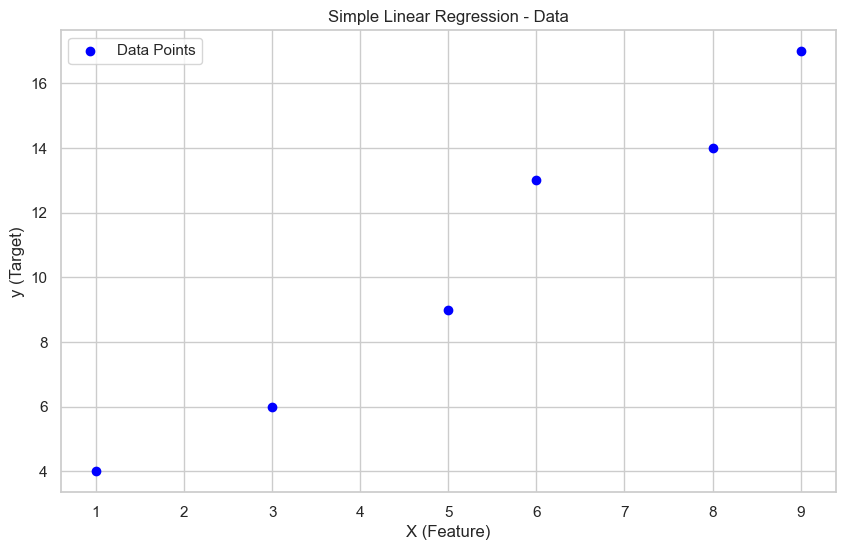

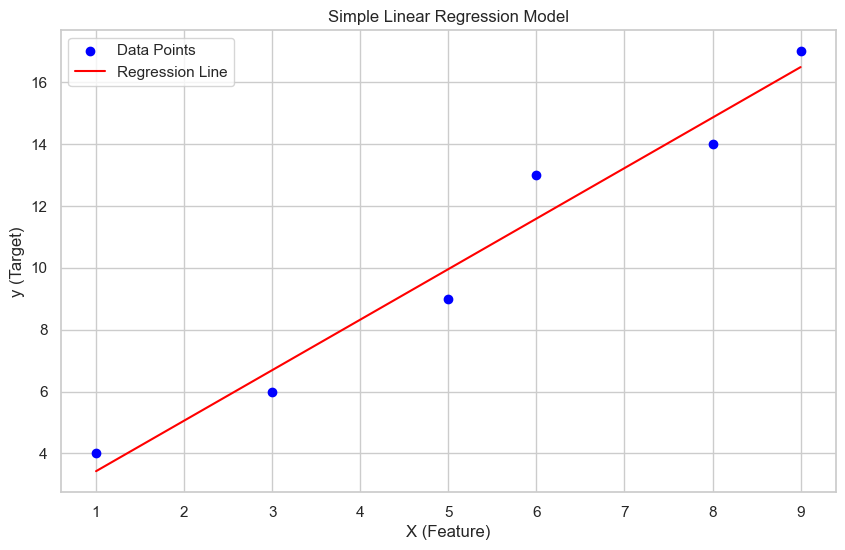

Intercept: 1.7941176470588225
Slope: 1.6323529411764708


In [5]:

# Generate sample data
X = np.array([1, 3, 5, 6, 8, 9]).reshape((-1, 1))
y = np.array([4, 6, 9, 13, 14, 17]).reshape((-1, 1))

# Scatter plot of the data
plt.scatter(X, y, color="blue", label="Data Points")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Simple Linear Regression - Data")
plt.legend()
plt.show()

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot regression line
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Simple Linear Regression Model")
plt.legend()
plt.show()

# Print coefficients
print(f"Intercept: {model.intercept_[0]}")
print(f"Slope: {model.coef_[0][0]}")



## Multiple Linear Regression
Linear regression can be extended to multiple variables. The equation now takes the form:

\[ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \varepsilon \]

We will apply multiple linear regression on a real-world dataset.


In [8]:

# Load a real-world dataset: California Housing dataset
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

# Display dataset preview
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


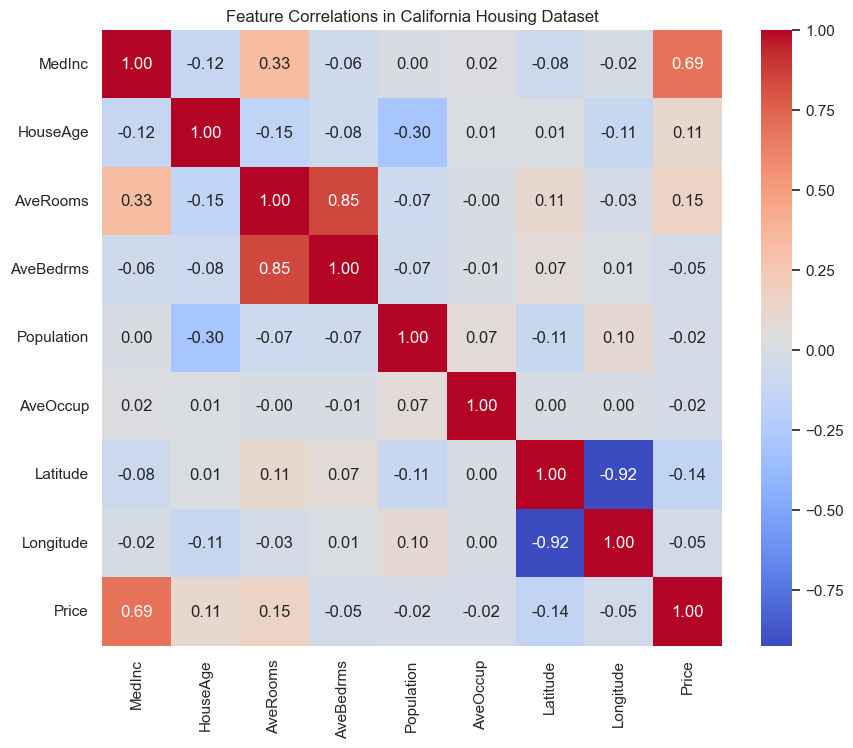

In [10]:

# Heatmap to visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations in California Housing Dataset")
plt.show()


In [12]:

# Splitting data into train and test sets
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multiple linear regression model
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

# Predictions
y_train_pred = multi_lr.predict(X_train)
y_test_pred = multi_lr.predict(X_test)

# Evaluate the model
print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Testing R² Score:", r2_score(y_test, y_test_pred))


Training R² Score: 0.6125511913966952
Testing R² Score: 0.5757877060324506



## Regularization: Ridge and Lasso Regression
To prevent overfitting, we use **Ridge** and **Lasso** regression.

- **Ridge Regression** (L2 Regularization) adds a penalty on large coefficients.
- **Lasso Regression** (L1 Regularization) can shrink coefficients to zero, performing feature selection.


In [15]:

# Train Ridge and Lasso models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Print coefficients comparison
print("Linear Regression Coefficients:", multi_lr.coef_)
print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


Linear Regression Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Ridge Coefficients: [ 4.48510924e-01  9.72596535e-03 -1.23014157e-01  7.81416761e-01
 -2.02581346e-06 -3.52585878e-03 -4.19786908e-01 -4.33680793e-01]
Lasso Coefficients: [ 3.92693362e-01  1.50810624e-02 -0.00000000e+00  0.00000000e+00
  1.64168387e-05 -3.14918929e-03 -1.14291203e-01 -9.93076483e-02]



## Polynomial Regression
Linear regression assumes a linear relationship, but what if the data follows a non-linear trend?
We can extend linear regression by adding polynomial features.


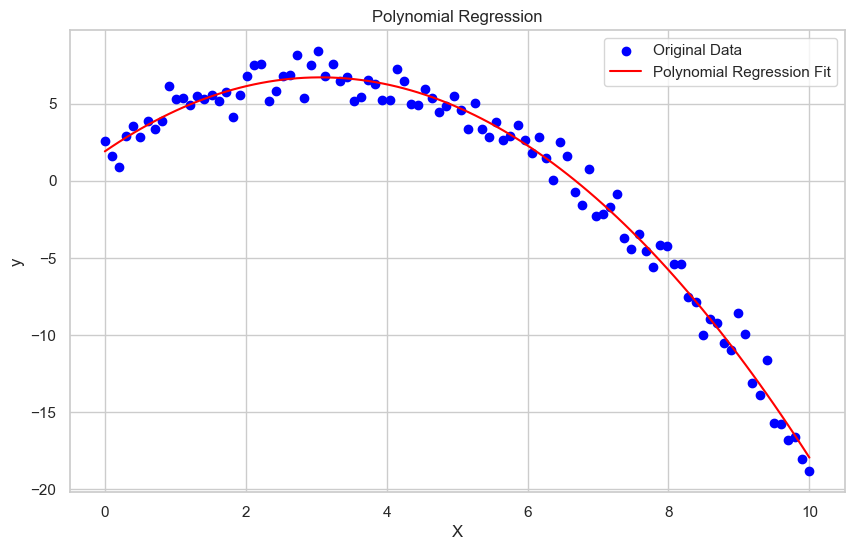

In [18]:

# Generate non-linear data
X_poly = np.linspace(0, 10, 100).reshape(-1, 1)
y_poly = 2 + 3 * X_poly - 0.5 * X_poly**2 + np.random.normal(0, 1, X_poly.shape)

# Transform features to polynomial terms
poly_features = PolynomialFeatures(degree=2)
X_poly_transformed = poly_features.fit_transform(X_poly)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_transformed, y_poly)

# Predictions
y_poly_pred = poly_model.predict(X_poly_transformed)

# Plot results
plt.scatter(X_poly, y_poly, color="blue", label="Original Data")
plt.plot(X_poly, y_poly_pred, color="red", label="Polynomial Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.show()



## Bias-Variance Tradeoff
The **bias-variance tradeoff** is a fundamental concept in machine learning.

- **High Bias (Underfitting)**: The model is too simple and fails to capture the underlying patterns.
- **High Variance (Overfitting)**: The model is too complex and learns noise instead of patterns.

We will demonstrate this by fitting models with different levels of complexity.


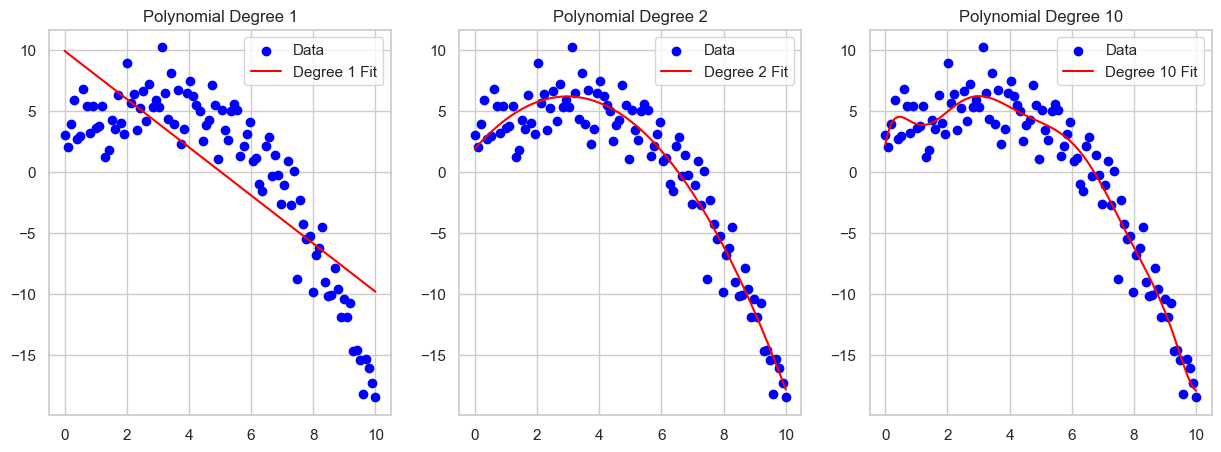

In [21]:

from sklearn.pipeline import make_pipeline

# Generate sample data
np.random.seed(42)
X_bv = np.linspace(0, 10, 100).reshape(-1, 1)
y_bv = 2 + 3 * X_bv - 0.5 * X_bv**2 + np.random.normal(0, 2, X_bv.shape)

# Models with increasing complexity
degrees = [1, 2, 10]  # Linear, Quadratic, High-degree Polynomial

plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    plt.subplot(1, 3, i)
    poly_features = PolynomialFeatures(degree=degree)
    model = make_pipeline(poly_features, LinearRegression())
    model.fit(X_bv, y_bv)
    y_bv_pred = model.predict(X_bv)
    
    plt.scatter(X_bv, y_bv, color="blue", label="Data")
    plt.plot(X_bv, y_bv_pred, color="red", label=f"Degree {degree} Fit")
    plt.title(f"Polynomial Degree {degree}")
    plt.legend()

plt.show()



## Cross-Validation
Instead of relying on a single train-test split, **cross-validation** helps us get a more reliable estimate of model performance.
We use **K-Fold Cross-Validation** to train the model multiple times and evaluate stability.


In [24]:

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(multi_lr, X, y, cv=5, scoring="r2")

# Display results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean R² Score: {np.mean(cv_scores):.4f}")


Cross-Validation Scores: [0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
Mean R² Score: 0.5530



## Hyperparameter Tuning with GridSearchCV
To optimize Ridge and Lasso models, we use **GridSearchCV** to find the best alpha value.


In [27]:

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Grid Search for Ridge
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring="r2")
ridge_grid.fit(X_train, y_train)
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")

# Grid Search for Lasso
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring="r2")
lasso_grid.fit(X_train, y_train)
print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']}")


Best Ridge Alpha: 10
Best Lasso Alpha: 0.01



## Comparing Different Regression Models
We will compare **Linear Regression, Decision Tree Regression, Random Forest Regression, and Neural Networks**.


In [30]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Train different models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# Display results
results_df = pd.DataFrame(results.items(), columns=["Model", "R² Score"])
print(results_df)


               Model  R² Score
0  Linear Regression  0.575788
1      Decision Tree  0.599732
2      Random Forest  0.649043
3     Neural Network  0.408004



## Additional Model Evaluation Metrics
Apart from R², we use:
- **Mean Absolute Error (MAE)**: Measures absolute differences.
- **Root Mean Squared Error (RMSE)**: Penalizes larger errors more.


In [32]:

from sklearn.metrics import mean_absolute_error

# Calculate MAE and RMSE for Linear Regression
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


Mean Absolute Error: 0.5332
Root Mean Squared Error: 0.7456



## Feature Importance & Selection
Some features have stronger impact than others. We use:
- **Random Forest Feature Importance**
- **Lasso Regression for Feature Selection**


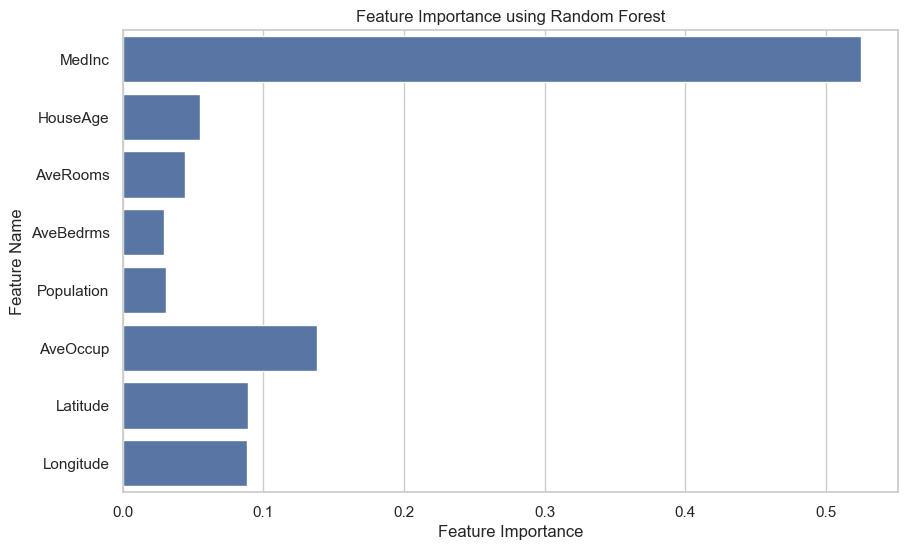

In [34]:

# Feature Importance from Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Plot feature importance
importance = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance using Random Forest")
plt.show()
